# Census Income Project


# Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Downlaod Files:
    
    
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Census_Income_Project.csv",skipinitialspace = True) # Importing the data, and striping the white space

In [3]:
df.head() # Checking the first five elements of the data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.tail() # Checking the last five elements of the data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.shape # We have 32560 rows, and 15 columns

(32560, 15)

There are 32560 rows and 15 columns in this dataset.That means we have total no of 32560 entries or information 32560 people.


In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Found out all the column names in this dataset.

In [7]:
df.info() # Checking basic information of the data frame, we have no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
Age               32560 non-null int64
Workclass         32560 non-null object
Fnlwgt            32560 non-null int64
Education         32560 non-null object
Education_num     32560 non-null int64
Marital_status    32560 non-null object
Occupation        32560 non-null object
Relationship      32560 non-null object
Race              32560 non-null object
Sex               32560 non-null object
Capital_gain      32560 non-null int64
Capital_loss      32560 non-null int64
Hours_per_week    32560 non-null int64
Native_country    32560 non-null object
Income            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
# checking null values in the dataset:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no null values in the dataset.


In [10]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [11]:
df.columns # Name of the coulmns present

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [12]:
# Statistical Summary:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [13]:
df['Income'].value_counts() # Income is our target variable, seems like we have an imbalanced class. we will deal with this in a later step

<=50K    24719
>50K      7841
Name: Income, dtype: int64

In [14]:
df['Workclass'].unique() # Unique variables in the 'Work class', as we can observe we have a '?' here.

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [15]:
df['Occupation'].unique() # Unique variables in the 'Occupation', as we can observe we have a '?' here.

array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [16]:
df['Native_country'].unique() # Unique variables in the 'Native country', as we can observe we have a '?' here.

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [17]:
df['Workclass'].value_counts()['?'] # Counting the value of '?' in work class

1836

In [18]:
df['Occupation'].value_counts()['?'] # Counting the value of '?' in Occupation

1843

In [19]:
df['Native_country'].value_counts()['?'] # Counting the value of '?' in native country

583

In [20]:
for cols in df.select_dtypes(exclude=np.number).columns:
    df[df == '?'] = np.nan
    df[df == ' ?'] = np.nan
# Removing the '?' data with NaN as it is not useful

In [21]:
df.dtypes # These are the data types we have

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# Exploratory Data Analysis

Checking kde of each colums

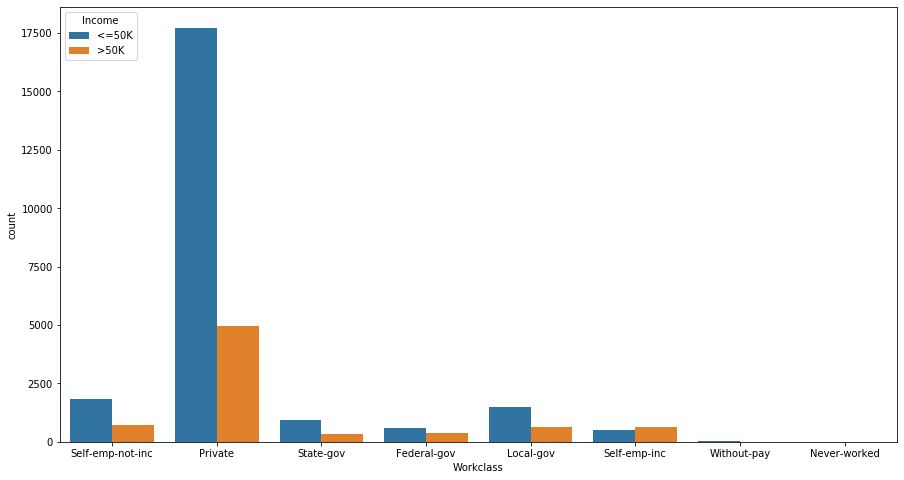

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x= df['Workclass'], hue=df['Income']);

We can observe that, self employed is the only work class in which a majority of people make more than 50K USD per year



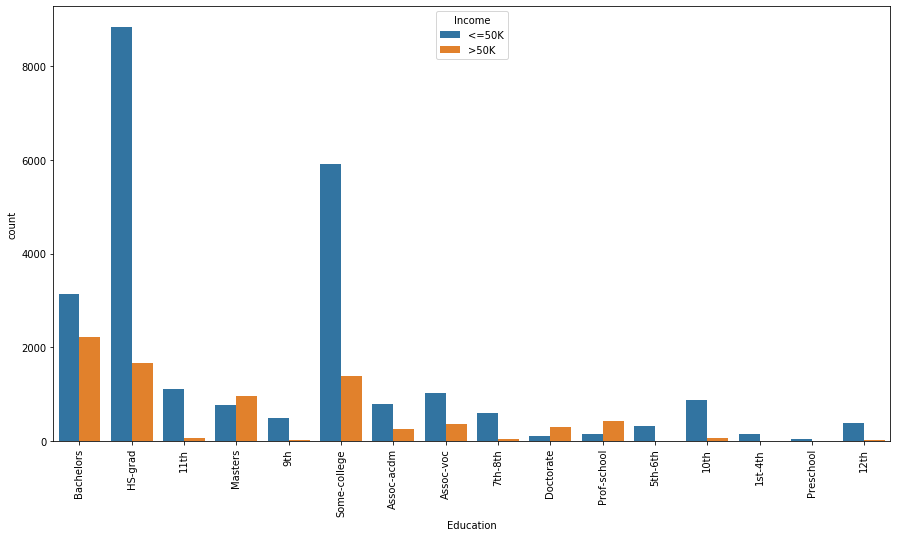

In [23]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = df, x = df['Education'], hue = df['Income'])
ax.tick_params(axis='x', rotation=90)

We can observe that, people who have a higher degree also have a higher proportion of people who earn >50K which means the more educated someone is, the more likely they are to earn more money.



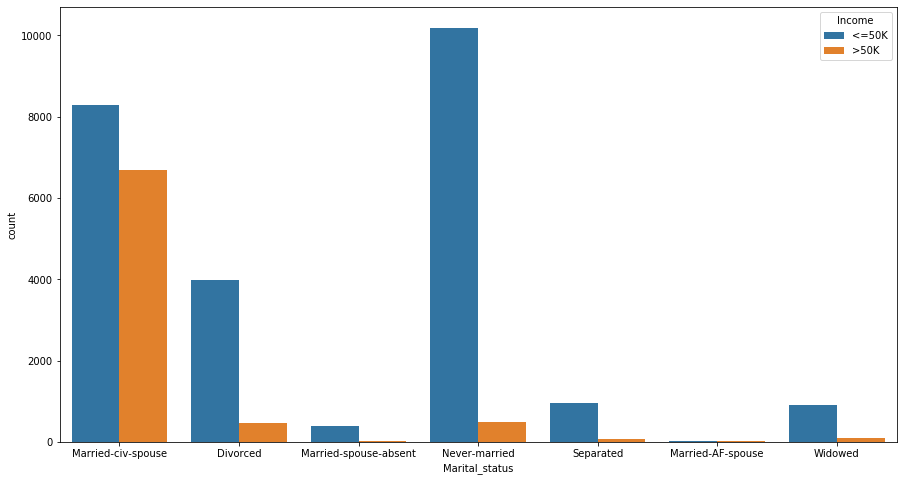

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = df['Marital_status'], hue=df['Income'])

We can observe that, married people have a higher chance of earning >50K USD



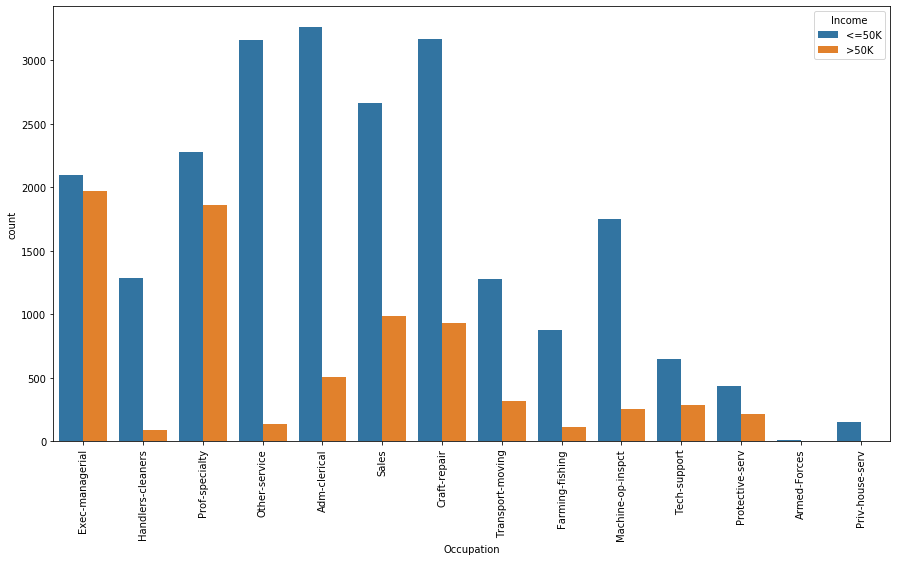

In [25]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = df, x = df['Occupation'], hue=df['Income'])
ax.tick_params(axis='x', rotation=90)

We can observe the distributuon between different occupations.



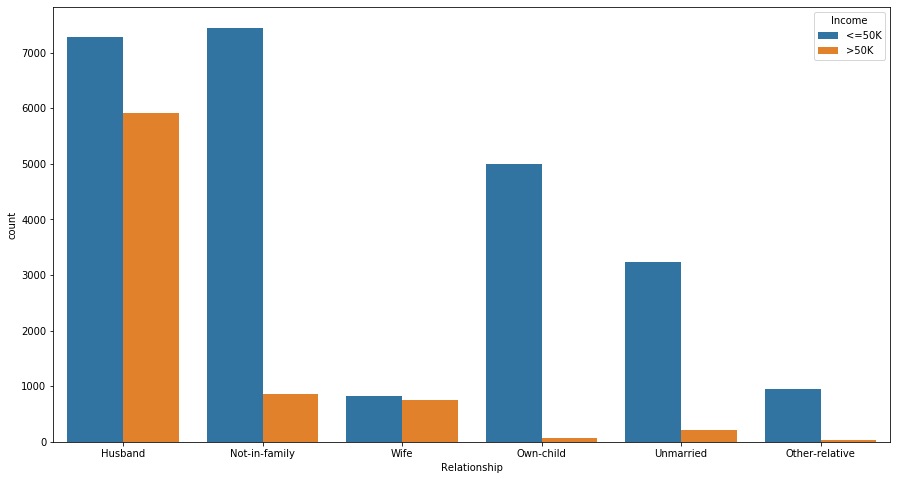

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = df['Relationship'], hue=df['Income'])

We can observe that, half the wifes earn >50K USD, people who are a unmarried have a hugh proportion earning <=50K



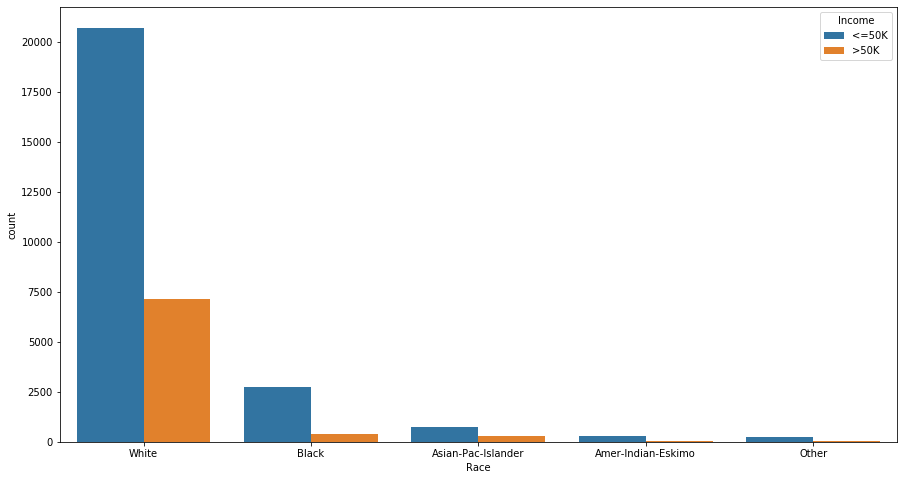

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = df['Race'], hue=df['Income'])

We can observe that, proprtionally, a white person is more likely to earn >50K compared to all other ethnic groups



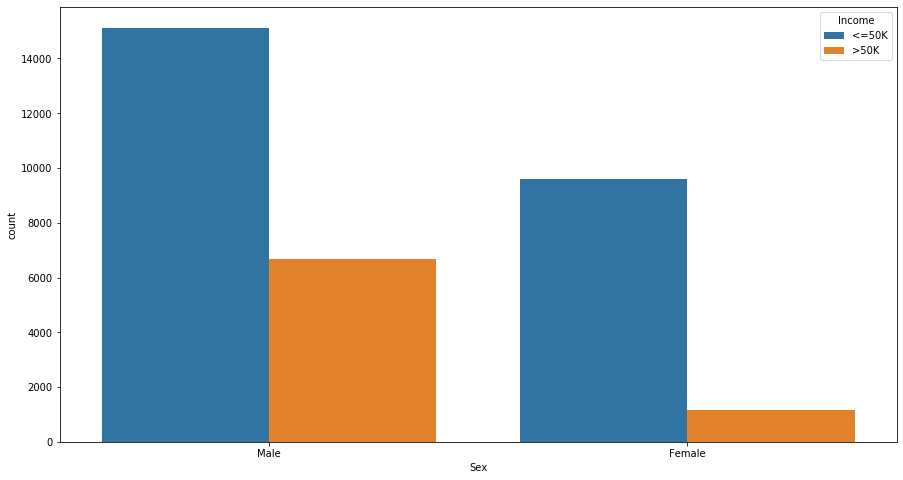

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = df['Sex'], hue=df['Income'])

We can observe that, we have a higher proportion of males earnign >50K compared to females.



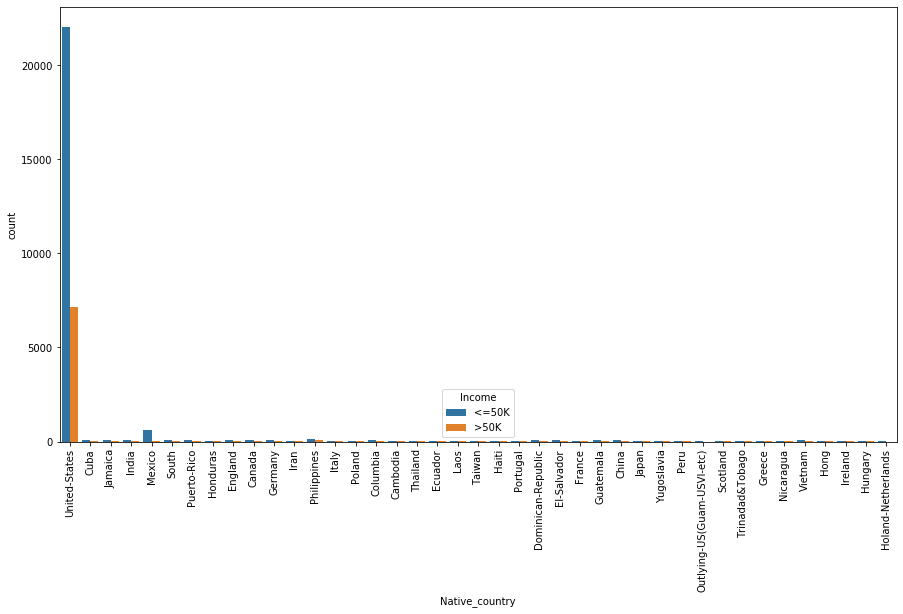

In [29]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = df, x = df['Native_country'], hue=df['Income'])
ax.tick_params(axis='x', rotation=90)

More than 90% of the data is based on United states here, which will bias the results for people from small minorities.



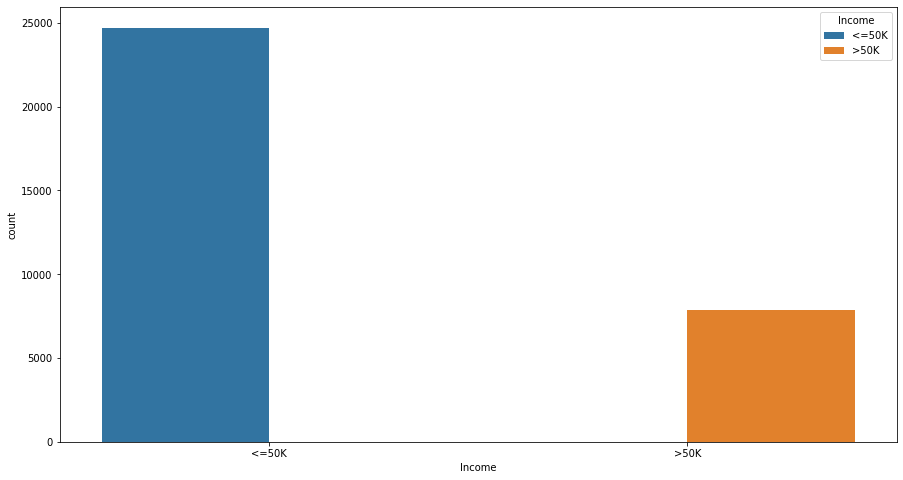

In [30]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = df['Income'], hue=df['Income'])

We can observe that, around 25% of the people earn more than 50K, while 75% of the population earn <=50 K



Plotting the age distribution



# Uni-variate analysis

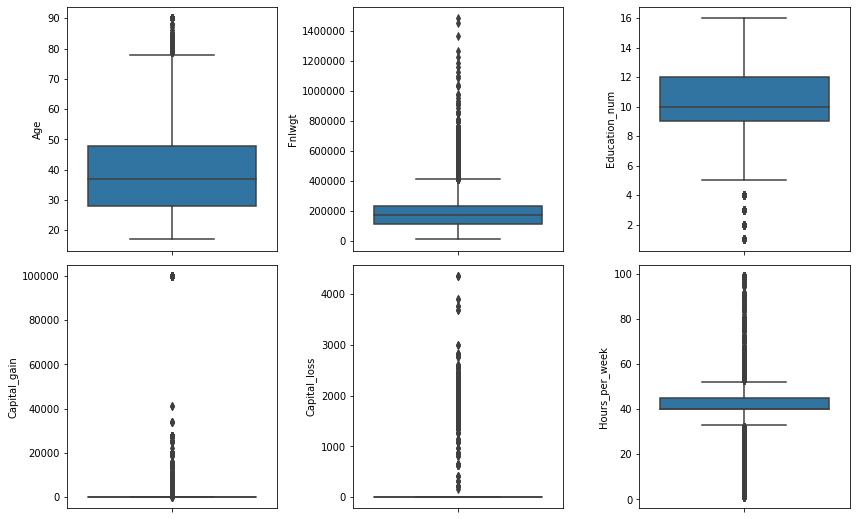

In [31]:
numerical_features = df.select_dtypes(exclude=['object']).copy()
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(5,3,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

# Bi-variate analysis

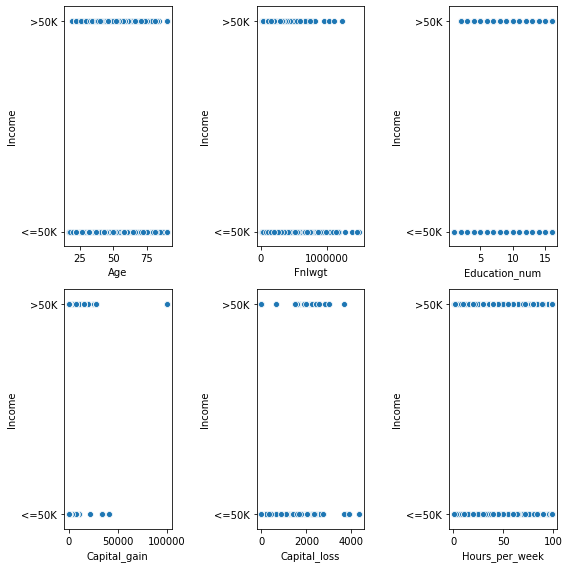

In [32]:
fig = plt.figure(figsize=(8,8))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(2, 3, i+1)
    sns.scatterplot(data = df, x= numerical_features.iloc[:, i],y=df['Income'])
plt.tight_layout()
plt.show()

# Multi-variate analysis

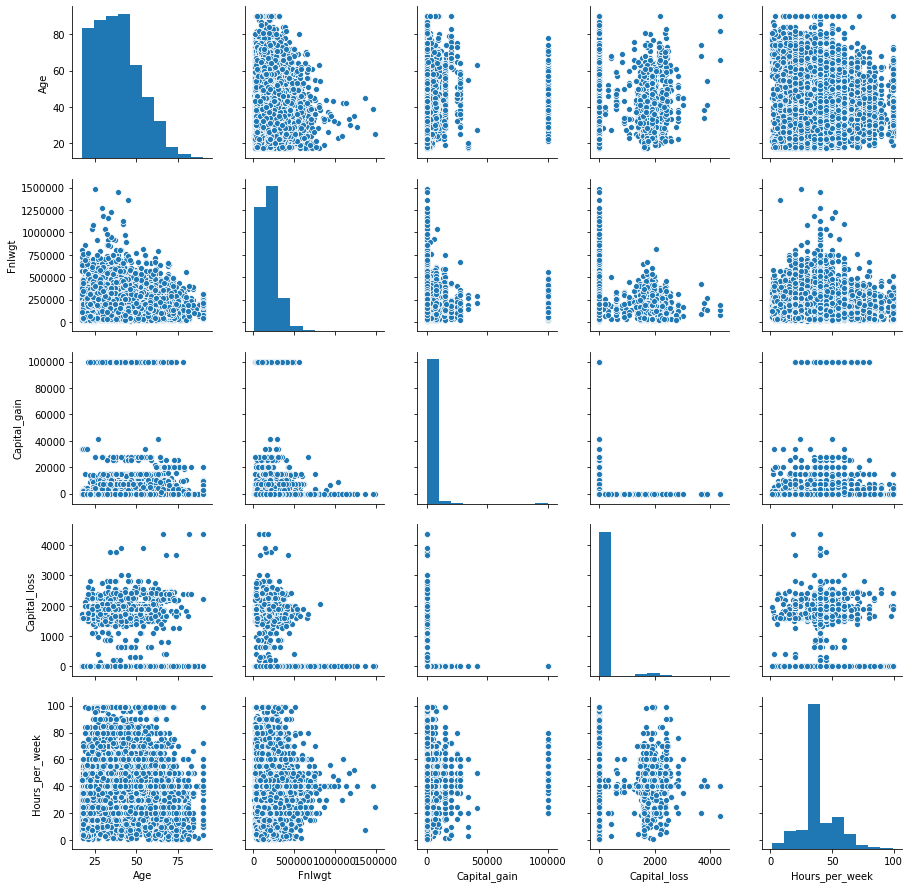

In [33]:
cont_col= ['Age', 'Fnlwgt', 'Capital_gain','Capital_loss', 'Hours_per_week'] 
sns.pairplot(df[cont_col])
plt.show()

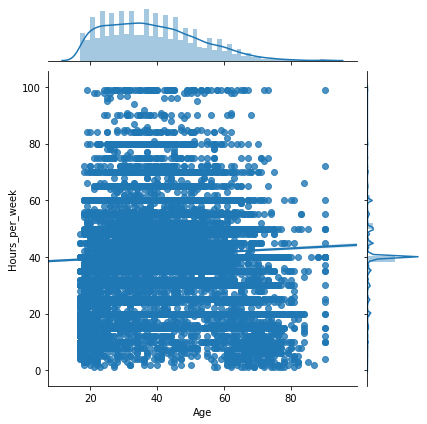

In [34]:
sns.jointplot(x=df.Age,y=df.Hours_per_week, kind = "reg")   
plt.show()

No co-relation between age and hours per week



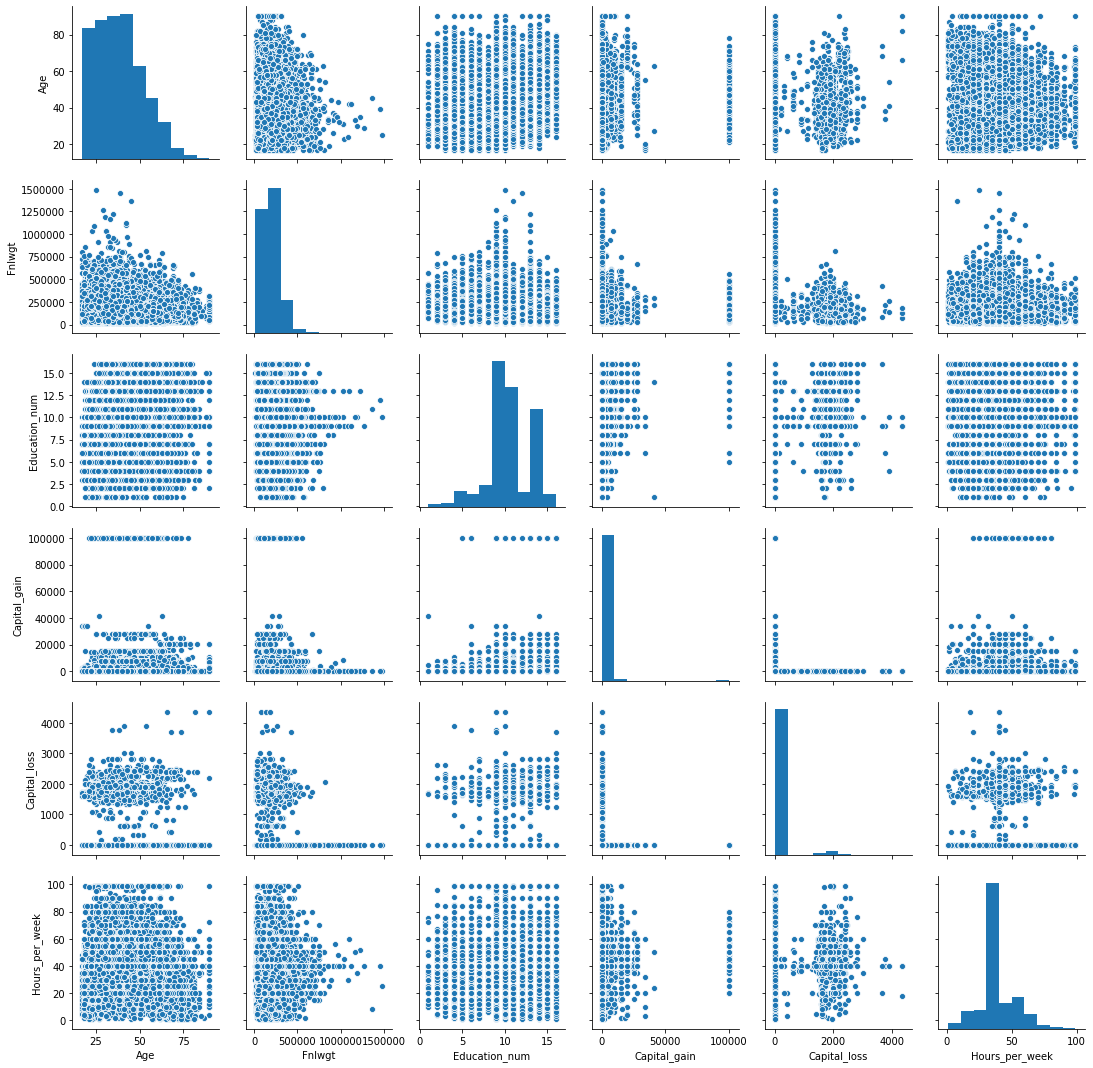

In [35]:
sns.pairplot(df)

In [36]:
# Counting the income column:
df['Income'].value_counts()

<=50K    24719
>50K      7841
Name: Income, dtype: int64

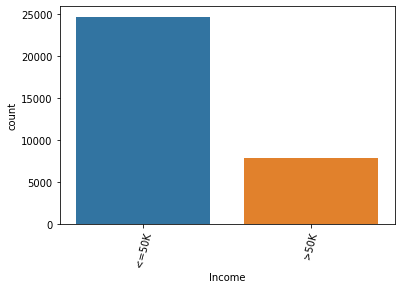

In [37]:
# Plotting the income column:
sns.countplot(df['Income'])
plt.xticks(rotation=75)
plt.show()

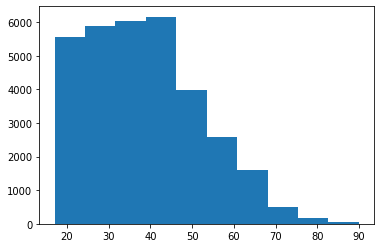

In [38]:
# Plotting the continuous columns:
# Plotting the Age column:
plt.hist(df['Age'])
plt.show()

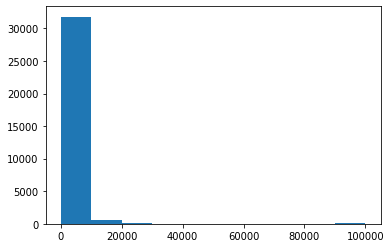

In [39]:
# Plotting the Capital gain column:
plt.hist(df['Capital_gain'])
plt.show()

Capital gain is 0 for most of the people.


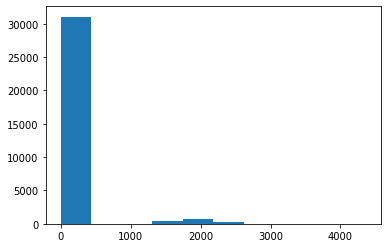

In [40]:
# Plotting the Capital_loss column:
plt.hist(df['Capital_loss'])
plt.show()

Capital loss is also 0 for most of the people and we can see that there are some values near 2000.


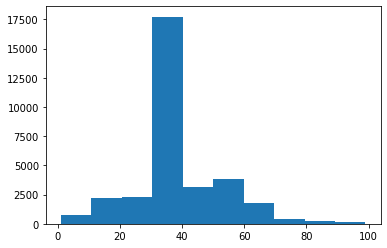

In [41]:
# Counting the Hours_per_week column:
plt.hist(df['Hours_per_week'])
plt.show()

Most of the people works ,40 hours per week.


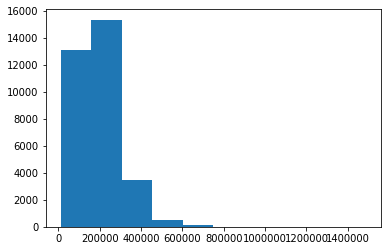

In [42]:
# Plotting the Fnlwgt column:
plt.hist(df['Fnlwgt'])
plt.show()

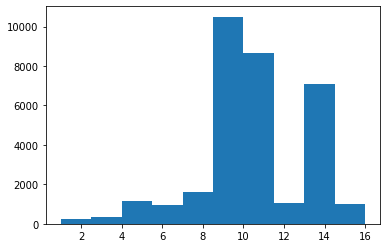

In [43]:
# Plotting Education Num column:
plt.hist(df['Education_num'])
plt.show()

The Education_num having code 9 is highest in number.
The Education_num havinf code 2 is highest in number.

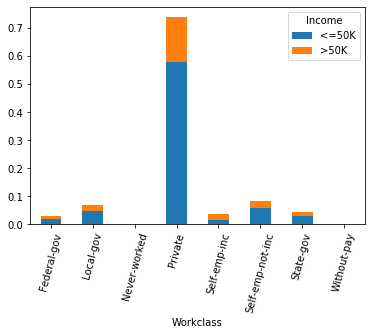

In [44]:
# Plotting Work class vs Income:
ct = pd.crosstab(df.Workclass, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

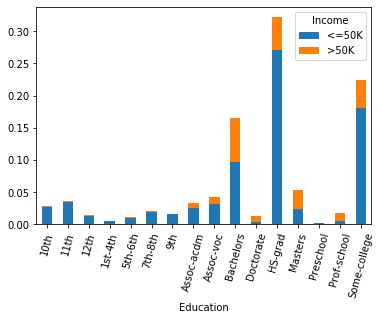

In [45]:
# Plotting Education vs Income column:
ct = pd.crosstab(df.Education, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

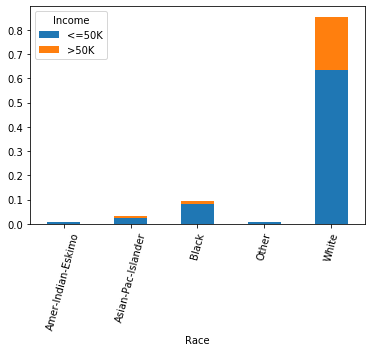

In [46]:
# Plotting Race vs Income column:
ct = pd.crosstab(df.Race, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

White people has more chance for earning more than 50k income.

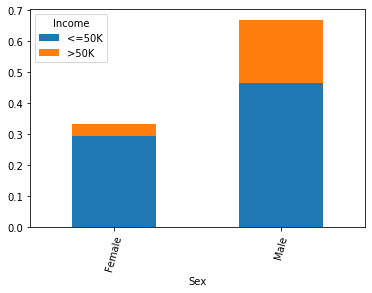

In [47]:
# Plotting Sex vs Income column:
ct = pd.crosstab(df.Sex, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Male population is more likely to earn >50k income.


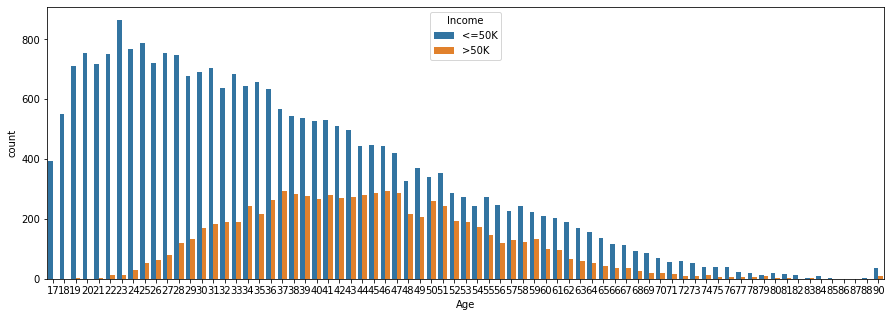

In [48]:
# Plotting Age vs Income
plt.figure(figsize=(15,5))
sns.countplot('Age', hue='Income', data=df)
plt.show()

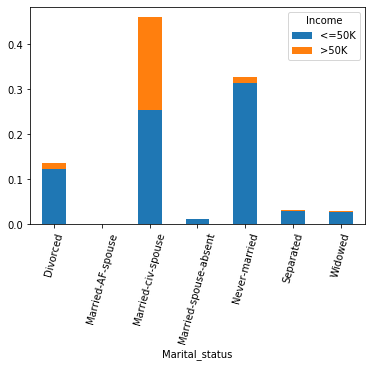

In [49]:
# Plotting Income Vs Martial Status:
ct = pd.crosstab(df.Marital_status, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

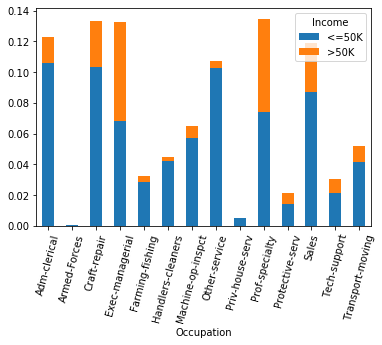

In [50]:
# Plotting income vs occupation column:
ct = pd.crosstab(df.Occupation, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

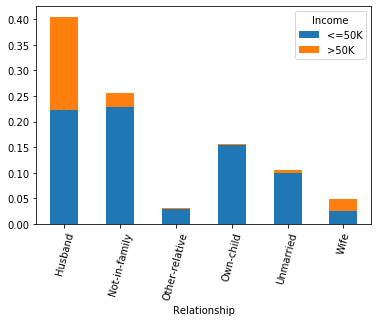

In [51]:
#Plotting Relationship vs Income column:
ct = pd.crosstab(df.Relationship, df.Income,normalize=True)
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

The relationship husband is having the higher chances to earn more than 50K.


In [52]:
df_features=df[['Age','Fnlwgt','Education_num',
'Capital_gain', 'Capital_loss', 'Hours_per_week']]   # Instantiating continuous variable into a single variable

Instantiating continuous variable into a single variable.


# Checking outliers:

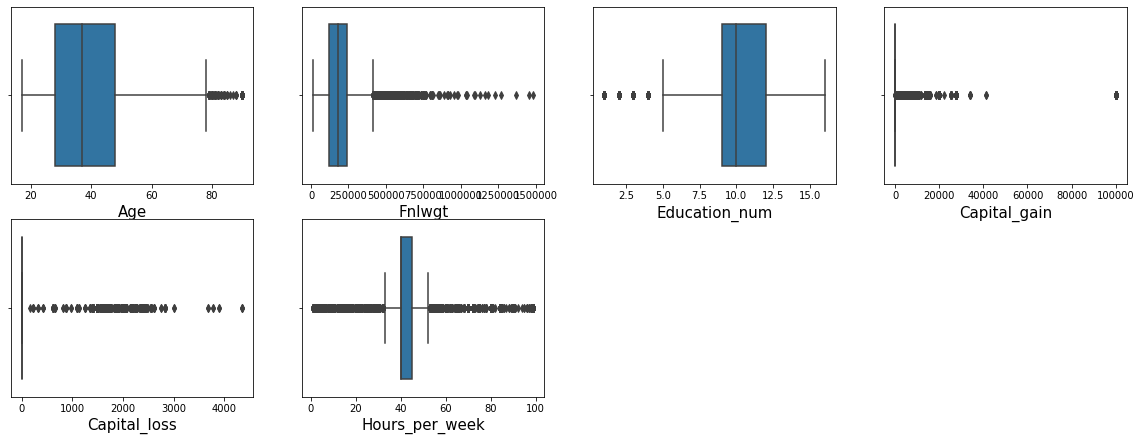

In [53]:
# checking outliers by using box plot:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=12:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

All the numerical data are having outliers that we need to take care.


# Checking Normal distribution:

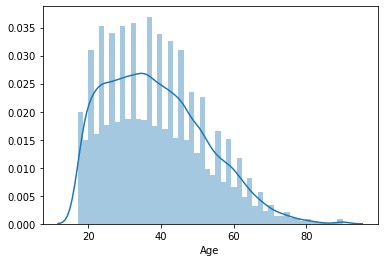

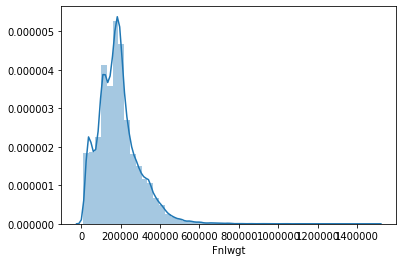

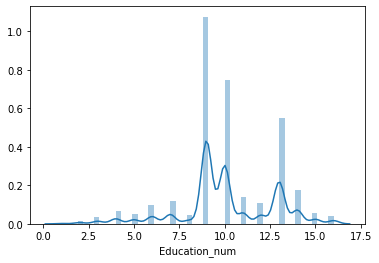

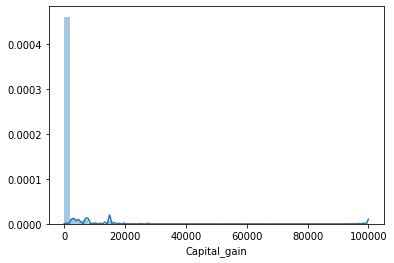

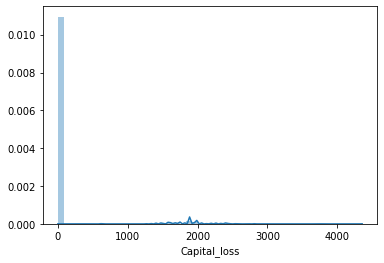

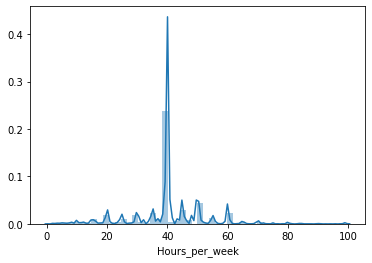

In [54]:
for i in df.columns:
    if df[i].dtypes==np.int64:
        sns.distplot(df[i])
        plt.show()

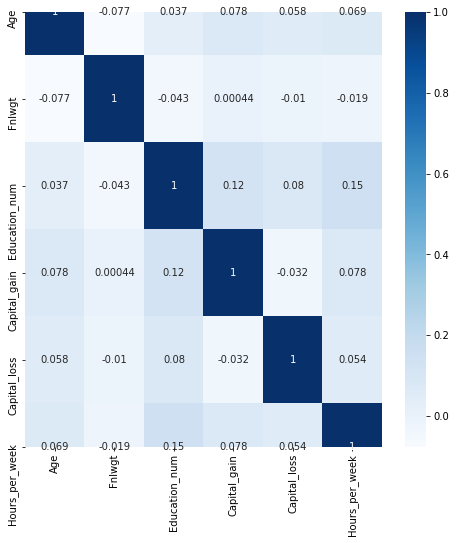

In [55]:
# Checking multi colinearity:
corr=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

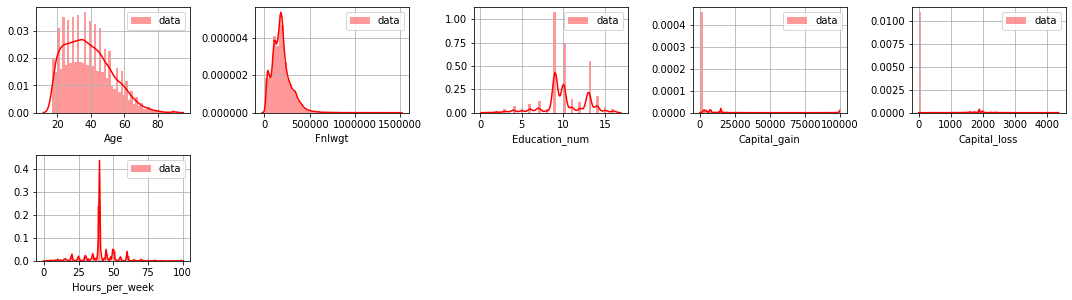

In [56]:
# Checking normal distribution:
plt.figure(figsize=(15,10))
for i,col in enumerate(list(df_features.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df_features[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

Filling "?" values:

In [57]:
df['Workclass'] = df['Workclass'].str.replace('?', 'Private', regex=True)

In [58]:
df['Workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

Merged the "?" workclass with the Private workclass.


In [59]:
df['Occupation'] = df['Occupation'].str.replace('?', 'Prof-specialty', regex=True)

In [60]:
df['Occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

Merged the "?" occupation with the Prof-specialty occupation.

In [61]:
df['Native_country'] = df['Native_country'].str.replace('?', 'United-States', regex=True)

In [62]:
df['Native_country'].value_counts()

United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

Merged the "?" narive_country with the United-states Native country.

In [63]:
df.head(30)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


As we can see there is no '?' value in workclass,occupation and Native_country columns.


# Feature Engineering:

In [64]:
df['Education'] = df['Education'].str.replace('Preschool', 'school', regex=True)
df['Education'] = df['Education'].str.replace('1st-4th', 'school', regex=True)
df['Education'] = df['Education'].str.replace('5th-6th', 'school', regex=True)
df['Education'] = df['Education'].str.replace('7th-8th', 'school', regex=True)
df['Education'] = df['Education'].str.replace('9th', 'school', regex=True)
df['Education'] = df['Education'].str.replace('10th', 'school', regex=True)
df['Education'] = df['Education'].str.replace('11th', 'school', regex=True)
df['Education'] = df['Education'].str.replace('12th', 'school', regex=True)

In [65]:
df['Education'] = df['Education'].str.replace('Hs-grad', 'high school', regex=True)

In [66]:
df['Education'] = df['Education'].str.replace('Assoc-voc', 'higher', regex=True)
df['Education'] = df['Education'].str.replace('Assoc-acdm', 'higher', regex=True)
df['Education'] = df['Education'].str.replace('Prof-school', 'higher', regex=True)
df['Education'] = df['Education'].str.replace('Some-college', 'higher', regex=True)

In [67]:
df['Education'] = df['Education'].str.replace('Bachelors', 'undergrad', regex=True)
df['Education'] = df['Education'].str.replace('Masters', 'grad', regex=True)
df['Education'] = df['Education'].str.replace('Doctorate', 'doc', regex=True)

In [68]:
df['Education'].value_counts()

HS-grad      10501
higher       10316
undergrad     5354
school        4253
grad          1723
doc            413
Name: Education, dtype: int64

As we can see we have combined the 16 categories of Education column into 7 categories for simplify the data.


In [69]:
df['Marital_status'] = df['Marital_status'].str.replace('Married-civ-spouse', 'Married', regex=True)
df['Marital_status'] = df['Marital_status'].str.replace('Married-AF-spouse', 'Married', regex=True)
df['Marital_status'] = df['Marital_status'].str.replace('Never-married', 'not-Married', regex=True)
df['Marital_status'] = df['Marital_status'].str.replace('Divorced', 'Others', regex=True)
df['Marital_status'] = df['Marital_status'].str.replace('Separated', 'Others', regex=True)
df['Marital_status'] = df['Marital_status'].str.replace('Widowed', 'Others', regex=True)
df['Marital_status'] = df['Marital_status'].str.replace('Married-spouse-absent', 'Others', regex=True)

In [70]:
df['Marital_status'].value_counts()

Married        14999
not-Married    10682
Others          6879
Name: Marital_status, dtype: int64

As we can see we have combined the 7 categories of Marital_status column into 3 categories for simplify the data.


In [71]:
# Label encode the Income column:
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
l_s = ['Income']
for i in l_s:
    df[i] = l.fit_transform(df[i])

In [72]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,undergrad,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Others,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,school,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,undergrad,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,grad,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [73]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [74]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


In [75]:
#Encoding the categorical columns into numerical:
LE = LabelEncoder()
df['Workclass'] = LE.fit_transform(df['Workclass'])
df['Education'] = LE.fit_transform(df['Education'])
df['Marital_status'] = LE.fit_transform(df['Marital_status'])
df['Occupation'] = LE.fit_transform(df['Occupation'])
df['Relationship'] = LE.fit_transform(df['Relationship'])
df['Race'] = LE.fit_transform(df['Race'])
df['Sex'] = LE.fit_transform(df['Sex'])
df['Native_country'] = LE.fit_transform(df['Native_country'])

In [76]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,5,13,0,3,0,4,1,0,0,13,38,0
1,38,3,215646,0,9,1,5,1,4,1,0,0,40,38,0
2,53,3,234721,4,7,0,5,0,2,1,0,0,40,38,0
3,28,3,338409,5,13,0,9,5,2,0,0,0,40,4,0
4,37,3,284582,2,14,0,3,5,4,0,0,0,40,38,0


encoded all the categorical columns into numerical.


In [77]:
#Removing outliers by using Z-score: 
from scipy.stats import zscore

z_score = zscore(df[[
'Age','Fnlwgt','Education_num',
'Capital_gain', 'Capital_loss', 'Hours_per_week']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000
mean,38.143729,3.363630,185196.131626,2.394039,10.077882,0.887920,6.389345,1.479465,3.664901,0.660945,570.163443,1.209408,39.896101,36.526067,0.223086
std,13.357668,1.575095,94546.412036,1.861314,2.452841,0.879754,4.337987,1.609835,0.850599,0.473397,2332.556812,32.712102,11.139681,5.989268,0.416323
min,17.000000,0.000000,12285.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,27.000000,3.000000,117517.500000,0.000000,9.000000,0.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,177669.000000,3.000000,10.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,3.000000,234281.500000,4.000000,12.000000,2.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,79.000000,8.000000,506329.000000,5.000000,16.000000,2.000000,14.000000,5.000000,4.000000,1.000000,22040.000000,1258.000000,77.000000,41.000000,1.000000


We have applied z-score, now let's check the skewness before model creation:


In [78]:
df.skew()

Age                0.491112
Workclass          1.181900
Fnlwgt             0.634168
Education         -0.165371
Education_num     -0.170298
Marital_status     0.219669
Occupation         0.130215
Relationship       0.743825
Race              -2.436068
Sex               -0.680003
Capital_gain       4.943642
Capital_loss      29.661241
Hours_per_week    -0.354170
Native_country    -4.297735
Income             1.330372
dtype: float64

In [79]:
features = ['Fnlwgt','Sex','Capital_gain','Capital_loss','Native_country']

In [80]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder

scaler=PowerTransformer(method='yeo-johnson')

In [81]:
df[features]=scaler.fit_transform(df[features].values)

In [82]:
df[features]

,Fnlwgt,Sex,Capital_gain,Capital_loss,Native_country
0,-1.113967,0.716230,-0.296683,-0.040148,0.198922
1,0.425203,0.716230,-0.296683,-0.040148,0.198922
2,0.605108,0.716230,-0.296683,-0.040148,0.198922
3,1.484491,-1.396199,-0.296683,-0.040148,-3.224293
4,1.046225,-1.396199,-0.296683,-0.040148,0.198922
...,...,...,...,...,...
32555,0.809685,-1.396199,-0.296683,-0.040148,0.198922
32556,-0.208537,0.716230,-0.296683,-0.040148,0.198922
32557,-0.236227,-1.396199,-0.296683,-0.040148,0.198922
32558,0.286963,0.716230,-0.296683,-0.040148,0.198922


In [83]:
df.skew()

Age                0.491112
Workclass          1.181900
Fnlwgt            -0.034910
Education         -0.165371
Education_num     -0.170298
Marital_status     0.219669
Occupation         0.130215
Relationship       0.743825
Race              -2.436068
Sex               -0.680003
Capital_gain       3.074074
Capital_loss      24.868849
Hours_per_week    -0.354170
Native_country    -1.569432
Income             1.330372
dtype: float64

Still there is huge skewness in Capital loss and Capital gain.we will delete this colums latte because this two contains mostly 0 values.


In [84]:
# Dropping the unwanted column:
df.drop(['Capital_gain','Capital_loss'], axis=1, inplace=True)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.113967,5,13,0,3,0,4,0.716230,13,0.198922,0
1,38,3,0.425203,0,9,1,5,1,4,0.716230,40,0.198922,0
2,53,3,0.605108,4,7,0,5,0,2,0.716230,40,0.198922,0
3,28,3,1.484491,5,13,0,9,5,2,-1.396199,40,-3.224293,0
4,37,3,1.046225,2,14,0,3,5,4,-1.396199,40,0.198922,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,0.809685,3,12,0,12,5,4,-1.396199,38,0.198922,0
32556,40,3,-0.208537,0,9,0,6,0,4,0.716230,40,0.198922,1
32557,58,3,-0.236227,0,9,1,0,4,4,-1.396199,40,0.198922,0
32558,22,3,0.286963,0,9,2,0,3,4,0.716230,20,0.198922,0


Dropped the Capital_gain and Capital_loss column.


In [85]:
# dividing the dataset into features and target.
x = df.drop(columns=['Income'], axis=1)
y = df['Income']
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50,5,-1.113967,5,13,0,3,0,4,0.716230,13,0.198922
1,38,3,0.425203,0,9,1,5,1,4,0.716230,40,0.198922
2,53,3,0.605108,4,7,0,5,0,2,0.716230,40,0.198922
3,28,3,1.484491,5,13,0,9,5,2,-1.396199,40,-3.224293
4,37,3,1.046225,2,14,0,3,5,4,-1.396199,40,0.198922
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,0.809685,3,12,0,12,5,4,-1.396199,38,0.198922
32556,40,3,-0.208537,0,9,0,6,0,4,0.716230,40,0.198922
32557,58,3,-0.236227,0,9,1,0,4,4,-1.396199,40,0.198922
32558,22,3,0.286963,0,9,2,0,3,4,0.716230,20,0.198922


In [86]:
# counting the Income class for balancing it with smote:
y.value_counts()

0    23173
1     6654
Name: Income, dtype: int64

In [87]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [88]:
df['Income'] = df['Income'].map({'<=50K': 0, '>50K': 1}) # Converting Income to a binary variavle

No handles with labels found to put in legend.


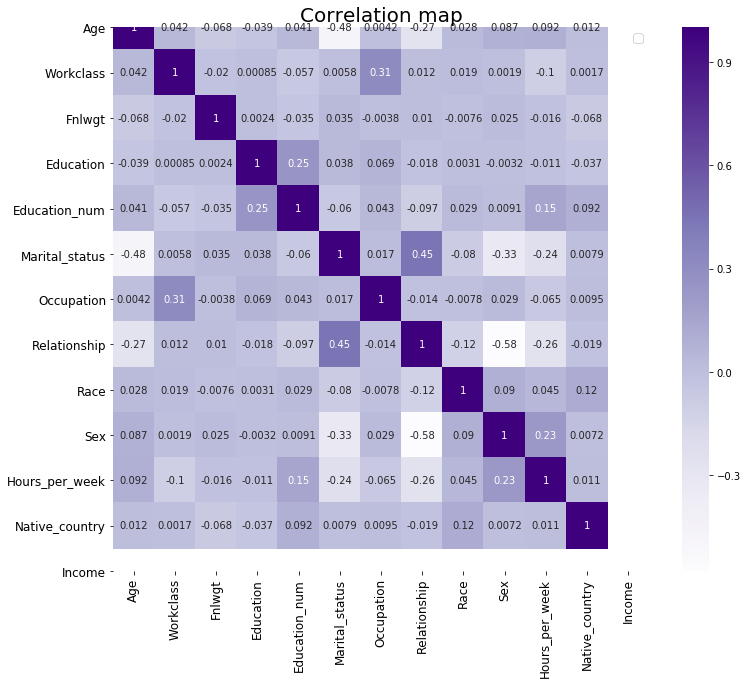

In [89]:
plt.figure(figsize = (12,10))
plt.title("Correlation map", fontsize = 20)
sns.heatmap(df.corr(), cmap = 'Purples', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 0)
plt.legend(fontsize=12)

We can observe that no signle variable is either highly co-related to our target variable income.



In [90]:
df.drop(['Education_num'], axis = 1, inplace = True) # Dropping the column as it is useless

In [91]:
df['Education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)

df['Race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

# Simplifying the data by merging minorities as one

In [92]:
df.describe() # Basic statisctics about the data

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
count,29827.000000,29827.000000,2.982700e+04,29827.000000,29827.000000,29827.000000,29827.000000,29827.000000,2.982700e+04,29827.000000,2.982700e+04,0.0
mean,38.143729,3.363630,-1.918798e-16,2.394039,0.887920,6.389345,1.479465,3.664901,-6.076505e-16,39.896101,-1.409619e-16,NaN
std,13.357668,1.575095,1.000017e+00,1.861314,0.879754,4.337987,1.609835,0.850599,1.000017e+00,11.139681,1.000017e+00,NaN
min,17.000000,0.000000,-2.581649e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.396199e+00,4.000000,-3.224293e+00,NaN
25%,27.000000,3.000000,-6.466762e-01,0.000000,0.000000,3.000000,0.000000,4.000000,-1.396199e+00,40.000000,1.989219e-01,NaN
50%,37.000000,3.000000,4.393817e-02,3.000000,1.000000,6.000000,1.000000,4.000000,7.162302e-01,40.000000,1.989219e-01,NaN
75%,47.000000,3.000000,6.010392e-01,4.000000,2.000000,10.000000,3.000000,4.000000,7.162302e-01,45.000000,1.989219e-01,NaN
max,79.000000,8.000000,2.679128e+00,5.000000,2.000000,14.000000,5.000000,4.000000,7.162302e-01,77.000000,3.502722e+00,NaN


# Encoding the catrgorical data

In [93]:
!pip install category_encoders
import category_encoders as ce

encoder = ce.OneHotEncoder(cols = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex'], handle_unknown='return_nan', return_df=True, use_cat_names=True)

In [94]:
#Fit and transform Data
data_encoded = encoder.fit_transform(df)
data_encoded

,Age,Workclass_5.0,Workclass_3.0,Workclass_6.0,Workclass_0.0,Workclass_1.0,Workclass_8.0,Workclass_4.0,Workclass_7.0,Workclass_2.0,...,Race_4.0,Race_2.0,Race_1.0,Race_0.0,Race_3.0,Sex_0.716230197244476,Sex_-1.3961991603359645,Hours_per_week,Native_country,Income
0,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,13,0.198922,NaN
1,38,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,40,0.198922,NaN
2,53,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,40,0.198922,NaN
3,28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,40,-3.224293,NaN
4,37,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,40,0.198922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,38,0.198922,NaN
32556,40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,40,0.198922,NaN
32557,58,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,40,0.198922,NaN
32558,22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20,0.198922,NaN


# Preparing data for training model

As the data was imbalanced, I will use SMOTE to balance the income to remove bias



In [95]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
Xo, yo = oversample.fit_resample(x, y)

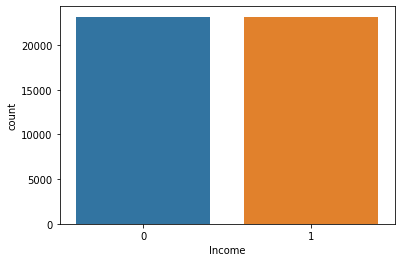

In [96]:
sns.countplot(x=yo)

Slpitting the data



In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.2, random_state = 5)

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Standardising the data

In [99]:
print(X_train.shape, X_test.shape) # Checking final shape before proceeding

(37076, 12) (9270, 12)


In [100]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = x.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = x.columns)

In [101]:
from sklearn.linear_model import LogisticRegression
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn                        import metrics, svm
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report # Importing required libraries

# Decision Tree Classifier

In [102]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=1)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.8294498381877022

In [103]:
scr = cross_val_score(dtr, x,y, cv=5)
print(scr.mean())

0.7800990637361365


# Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(random_state=5)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.8731391585760517

In [105]:
scr = cross_val_score(rfr, x,y, cv=5)
print(scr.mean())

0.831830459218612


# Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
llr = LogisticRegression()
llr.fit(X_train, y_train)
y_pred_rfr = llr.predict(X_test)
llr.score(X_test, y_test)

0.8070118662351672

In [107]:
scr = cross_val_score(llr, x,y, cv=5)
print(scr.mean())

0.8302884099587521


# K-Neighbors Classifier

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =15)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn.score(X_test, y_test)

0.8299892125134843

In [109]:
scr = cross_val_score(knn, x,y, cv=5)
print(scr.mean())

0.8171122361726229


# Gradient Boosting Classifier

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gba = GradientBoostingClassifier(random_state=1)
gba.fit(X_train, y_train)
y_pred_gba = gba.predict(X_test)
gba.score(X_test,y_test)

0.8382955771305286

In [111]:
scr = cross_val_score(gba, x,y, cv=5)
print(scr.mean())

0.8447383454552044


# CROSS VALIDATION SCORE:

In [112]:
print(f" CV Score of LR:{cross_val_score(llr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:83.03%


In [113]:
print(f" CV Score of gba:{cross_val_score(gba,x,y,cv=5).mean()*100:.2f}%")

 CV Score of gba:84.47%


In [114]:
print(f" CV Score of knn:{cross_val_score(knn,x,y,cv=5).mean()*100:.2f}%")

 CV Score of knn:81.71%


In [115]:
print(f" CV Score of rfr:{cross_val_score(rfr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of rfr:83.18%


In [116]:
print(f" CV Score of dtr:{cross_val_score(dtr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of dtr:78.01%


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score

In [118]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
adc=AdaBoostClassifier(n_estimators=100)

model=[lg,sv,knn,rfc,dtc,gnb,adc]

Test=[]

for m in model:
    m.fit(X_train,y_train)
    pred=m.predict(X_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.8070118662351672
[[3420 1229]
 [ 560 4061]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.79      4649
           1       0.77      0.88      0.82      4621

    accuracy                           0.81      9270
   macro avg       0.81      0.81      0.81      9270
weighted avg       0.81      0.81      0.81      9270

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.8307443365695792
[[3540 1109]
 [ 460 4161]]
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      4649
           1       0.79      0.90      0.84      4621

    accuracy                           0.83      9270
   macro avg       0.84      0.83      0.83      9270
weighted avg       0.84      0.83      0.83      9270

-----------------------------------------------------------------------------------

# Cross Validation
We will check the Underfitting or Overfitting of the model using Cross Validation

In [119]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.8302884099587521
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.8277067562794365
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.8060149452654171
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.8317297994025378
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.7821442490963741
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.7722866908008191
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.8424586318841133
-------------------------------------------------------------------------------


# ROC_AUC score

AUC Score of LogisticRegression()
0.8072280915321578




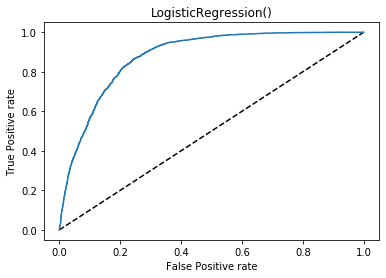



------------------------------------------------------------------------
AUC Score of SVC(probability=True)
0.8309542616173912




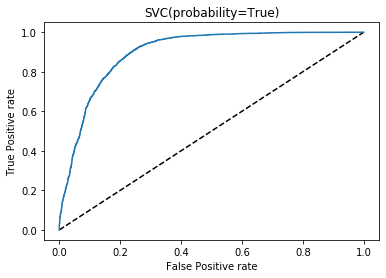



------------------------------------------------------------------------
AUC Score of KNeighborsClassifier()
0.8404030223112393




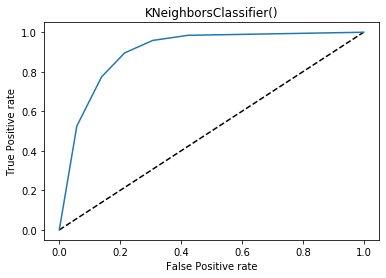



------------------------------------------------------------------------
AUC Score of RandomForestClassifier()
0.8732318426791678




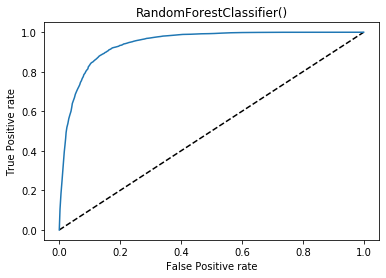



------------------------------------------------------------------------
AUC Score of DecisionTreeClassifier()
0.831523990401912




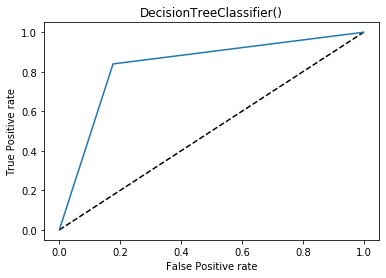



------------------------------------------------------------------------
AUC Score of GaussianNB()
0.7572741022692843




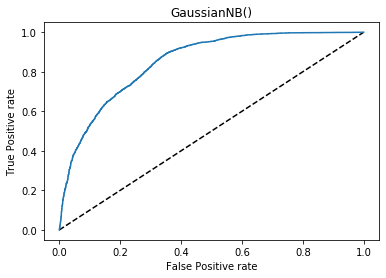



------------------------------------------------------------------------
AUC Score of AdaBoostClassifier(n_estimators=100)
0.8276313130704241




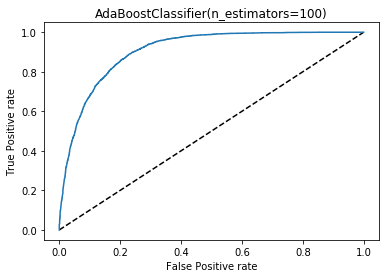



------------------------------------------------------------------------


In [122]:
auc=[]
for m in model:
    y_pred_prob=m.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(X_test))
    auc.append(auc_score)
    print('AUC Score of', m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print('\n')
    print('------------------------------------------------------------------------')

# Lets see all our model performance.

In [123]:
Performance={'Model':['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','AdaBoostClassifier'],
           'Test Score':Test,'Cross Validation Score':cv,'ROC AUC Score':auc}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test Score,Cross Validation Score,ROC AUC Score
0,LogisticRegression,0.807012,0.830288,0.807228
1,SVC,0.830744,0.827707,0.830954
2,KNeighborsClassifier,0.840237,0.806015,0.840403
3,RandomForestClassifier,0.873139,0.831730,0.873232
4,DecisionTreeClassifier,0.831499,0.782144,0.831524
5,GaussianNB,0.757174,0.772287,0.757274
6,AdaBoostClassifier,0.827508,0.842459,0.827631


# PCA

I performed PCA, but selection 32-42 components (out of a total 47 components) didn't improve the score (containing 90% and 99.9997% of the data respectively). So I have decided to remove it in the final model.

# Hyper paramter tuning

As Gradient Boosting classifier has achieved the highest accuracy and cross val score, I will be further tuning it.

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
parameters = { 'loss' : ['deviance','exponential'],
               'learning_rate' : [0.1,0.2], 
              'n_estimators': [100,150],
              'max_depth':[3,4]
} # Selected hyper parameters

In [126]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5) # Tuning with 5 corss validations

In [127]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 4], 'n_estimators': [100, 150]})

In [128]:
GCV.best_params_

{'learning_rate': 0.2,
 'loss': 'exponential',
 'max_depth': 4,
 'n_estimators': 150}

In [129]:
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.2, random_state = 5)

In [130]:
mod = GradientBoostingClassifier(learning_rate = 0.2,loss = 'exponential', max_depth = 4, n_estimators = 150 )

mod.fit(X_train, y_train)
mod_pred = mod.predict(X_test)
mod.score(X_test, y_test)

0.8513484358144552

After using Hyper Parameter tuning we got the score of approx 85%.

In [131]:
pd.DataFrame(confusion_matrix(y_test, mod_pred), columns=['Predicted Yes', "Predicted No"], index=['Actual Yes', 'Actual No'])

,Predicted Yes,Predicted No
Actual Yes,3773,876
Actual No,502,4119


# Plotting AUROC

In [132]:
y_score = mod.predict_proba(X_test)[:,1]

In [133]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

In [134]:
roc_accuracy = roc_auc_score(y_test, y_score)

In [135]:
print('roc_auc_score for DecisionTree: ', roc_accuracy)

roc_auc_score for DecisionTree:  0.9302722395431297


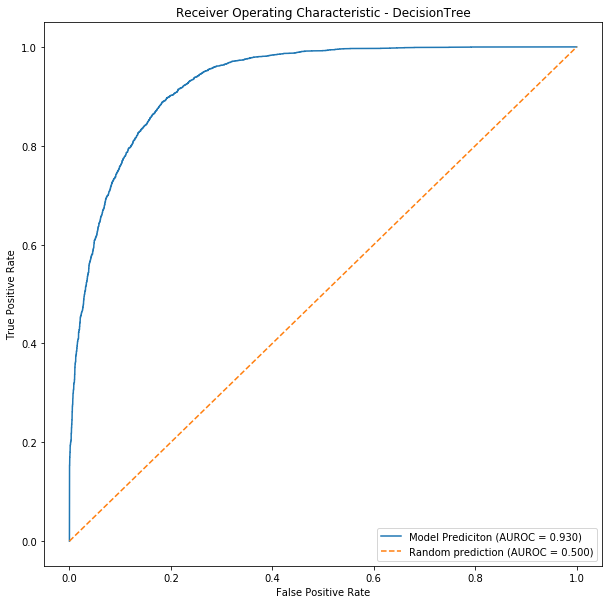

In [136]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate, true_positive_rate, label ='Model Prediciton (AUROC = %0.3f)' %roc_accuracy)
plt.plot([0, 1], ls="--", label = 'Random prediction (AUROC = %0.3f)' %0.500)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# Saving the model

In [137]:
import joblib
joblib.dump(mod,"Census Income.pkl")

['Census Income.pkl']

In [139]:
rf_census_joblib=joblib.load('Census Income.pkl')
rf_census_joblib.predict(X_test)

#TESTING THE SAVED MODEL

array([0, 1, 1, ..., 1, 0, 1])